In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Regularization & restrictions


* Regularization - technique that reduces model complexity to prevent overfitting
* Desired outcomes:
    * train loss goes up
    * test loass goes down
* Have we already seen it?

## Regularization

* Insert additional requirement for regularizer $R(\beta)$ to be small:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{\beta}
$$
* $\lambda>0$ - hyperparameter.
* $R(\beta)$ penalizes complexity of models.
$$
\begin{array}{ll}
R(\beta)=||\beta||_{1} &  \mbox{(L1) Lasso regression}\\
R(\beta)=||\beta||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

* Not only **accuracy** matters for the solution but also **model simplicity**!
* $\lambda$ controls complexity of the model:$\uparrow\lambda\Leftrightarrow\text{complexity}$$\downarrow$.

## Comments
* Dependency of $\beta$ from $\lambda$ for ridge (A) and LASSO (B):
<center><img src="img/regularization paths.png"></center>

* LASSO can be used for automatic feature selection.
* $\lambda$ is usually found using cross-validation on exponential grid, e.g. $[10^{-6},10^{-5},...10^{5},10^{6}]$.
* It's always recommended to use regularization because 
    * it gives smooth control over model complexity.
    * reduces ambiguity for multiple solutions case.

<center><img src=img/regul.jpg></center>

In [8]:
from sklearn.linear_model import Lasso, Ridge

In [9]:
df_auto = pd.read_csv('accord_sedan_training.csv')
df_auto = df_auto.assign(kilometrage = lambda r: r.mileage*1.6)
df_auto.loc[:, ['mileage', 'kilometrage', 'price']].head()

,mileage,kilometrage,price
0,67697,108315.2,14995
1,73738,117980.8,11988
2,80313,128500.8,11999
3,86096,137753.6,12995
4,79607,127371.2,11333


Model:
price = 16762.02 + (-0.05)*mileage + (-0.00)*kilometrage


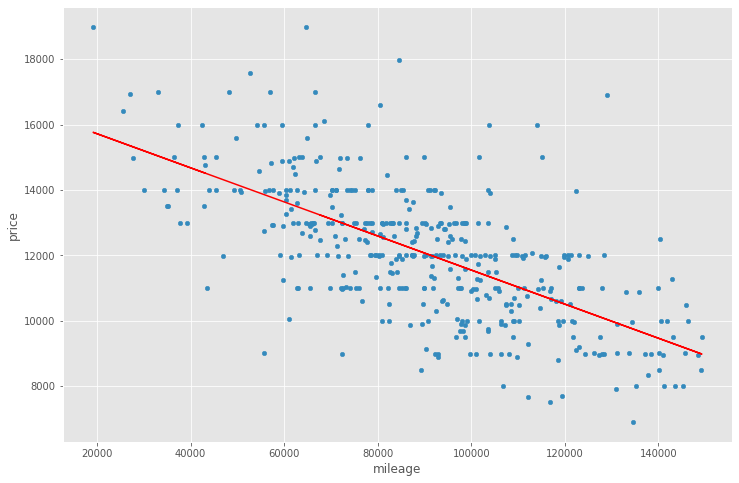

In [10]:
X_train = df_auto.loc[:, ['mileage', 'kilometrage']].values
y_train = df_auto.price.values

model = Lasso()
# model = Ridge()
model.fit(X_train, y_train)

print('Model:\nprice = %.2f + (%.2f)*mileage + (%.2f)*kilometrage' % (model.intercept_, model.coef_[0], model.coef_[1],))

y_hat = model.predict(X_train)

df_auto.plot(x='mileage', y='price', kind='scatter')
_ = plt.plot(X_train[:, 0], y_hat, c='r')

## ElasticNet
* ElasticNet:

$$
R(\beta)=\alpha||\beta||_{1}+(1-\alpha)||\beta||_{2}^{2}\to\min_{\beta}
$$
$\alpha\in(0,1)$ - hyperparameter, controlling impact of each part. 

* If two features $x^{i}$and $x^{j}$ are equal: 
    * LASSO may take only one of them
    * Ridge will take both with equal weight
        * but it doesn't remove useless features
* ElasticNet both removes useless features but gives equal weight for usefull equal features
    * good, because feature equality may be due to chance on this particular training set

## Ridge regression analytic solution

Ridge regression criterion
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda\beta^{T}\beta\to\min_{\beta}
$$

Stationarity condition can be written as:

$$
\begin{gathered}2\sum_{n=1}^{N}x_{n}\left(x_{n}^{T}\beta-y_{n}\right)+2\lambda\beta=0\\
2X^{T}(X\beta-y)+\lambda\beta=0\\
\left(X^{T}X+\lambda I\right)\beta=X^{T}y
\end{gathered}
$$

so

$$
\widehat{\beta}=(X^{T}X+\lambda I)^{-1}X^{T}y
$$

## Comments
* $X^{T}X+\lambda I$ is always non-degenerate as a sum of: 
    * non-negative definite $X^{T}X$
    * positive definite $\lambda I$


* Intuition:
    * out of all valid solutions select one giving simplest model
* Other regularizations also restrict the set of solutions.

## Different account for different features

* Traditional approach regularizes all features uniformly:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{w}
$$
* Suppose we have $K$ groups of features with indices:
$$
I_{1},I_{2},...I_{K}
$$
* We may control the impact of each group on the model by:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda_{1}R(\{\beta_{i}|i\in I_{1}\})+...+\lambda_{K}R(\{\beta_{i}|i\in I_{K}\})\to\min_{w}
$$
* $\lambda_{1},\lambda_{2},...\lambda_{K}$ can be set using cross-validation
* In practice use common regularizer but with different feature scaling.

## Different loss-functions

### Idea
* Generalize squared to arbitrary loss:
$$
\sum_{n=1}^{N}\left(x^{T}\beta-y_{n}\right)^{2}\to\min_{\beta}\qquad\Longrightarrow\qquad\sum_{n=1}^{N}\mathcal{L}(x_{n}^{T}\beta-y_{n})\to\min_{\beta}
$$

$$
\begin{array}{lll}
\textbf{LOSS} & \textbf{NAME} & \textbf{PROPERTIES}\\
\mathcal{L}(\varepsilon)=\varepsilon^{2} & \text{quadratic} & \text{differentiable}\\
\mathcal{L}(\varepsilon)=\left|\varepsilon\right| & \text{absolute} & \text{robust}\\
\mathcal{L}(\varepsilon)=\begin{cases}
\frac{1}{2}\varepsilon^{2}, & \left|\varepsilon\right|\le\delta\\
\delta\left(\left|\varepsilon\right|-\frac{1}{2}\delta\right) & \left|\varepsilon\right|>\delta
\end{cases} & \text{Huber} & \text{differentiable, robust}
\end{array}
$$

* Robust means solution is robust to outliers in the training set.

<center><img src="img/Loss functions.png"></center>